In [ ]:
import pandas as pd
import numpy as np
import json, os, uuid
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
final_merged_reviews = pd.read_csv("/content/drive/MyDrive/BarclaysReviews/final_merged_reviews.csv")



In [ ]:
ratingColName = 'customer_sentiment'
final_merged_reviews[ratingColName] = 'POSITIVE'
for i in final_merged_reviews.index:
    if final_merged_reviews['rating'][i] > 3:
      final_merged_reviews[ratingColName][i] = 'POSITIVE'
    else:
      final_merged_reviews[ratingColName][i] = 'NEGATIVE'


<ipython-input-8-c81c8ff3faa7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_merged_reviews[ratingColName][i] = 'NEGATIVE'
<ipython-input-8-c81c8ff3faa7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_merged_reviews[ratingColName][i] = 'POSITIVE'


In [ ]:
final_merged_reviews.tail()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,source,review_id,user_name,review_title,review_description,rating,thumbs_up,reviewCreatedVersion,review_date,developer_response,developer_response_date,laguage_code,country_code,customer_sentiment
30967,293,NaN,2127,App Store,1fb67227-867a-4404-9e73-f89be07d9f17,Rocques,Excellent Site,"The connection to the Barclays site is safe, e...",5,NaN,NaN,2022-02-12,NaN,NaN,en,gb,POSITIVE
30968,294,NaN,2128,App Store,0a39288a-281a-42c0-a023-4082f28b97b3,sandeep-apple,Don’t see freeze card and see pin option,"Hi, I don’t see show pin and card detail optio...",3,NaN,NaN,2022-02-26,"{'id': 28360568, 'body': 'Hi there. We are awa...",NaN,en,gb,NEGATIVE
30969,295,NaN,2129,App Store,ad7c6277-5696-478e-9b66-af79813747e8,Blondi_shh,Using this app for few years already is essent...,Working with no issues .\nDefinitely recommend,5,NaN,NaN,2022-02-11,NaN,NaN,en,gb,POSITIVE
30970,296,NaN,2130,App Store,5de80dcb-1e9b-44d9-8484-401992110f06,Maggied1307,Barclays Mobile Banking,I have had Barclays Mobile Banking since it st...,5,NaN,NaN,2022-02-07,NaN,NaN,en,gb,POSITIVE
30971,297,NaN,2131,App Store,6db04b59-a7ad-4f18-bba5-23af752cbac1,lord ste,The service is flawless and long should it con...,The service is flawless - and long should it ...,5,NaN,NaN,2022-02-04,NaN,NaN,en,gb,POSITIVE


In [ ]:

!pip install -q plotly-express

In [ ]:
##merge reviews
final_merged_reviews['rating'].mean()


4.27557148392096

In [ ]:
final_merged_reviews[final_merged_reviews['source']=='Google Play'].mean()

<ipython-input-15-1285b6f1521d>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  final_merged_reviews[final_merged_reviews['source']=='Google Play'].mean()


Unnamed: 0.2    15336.500000
Unnamed: 0.1    15336.500000
Unnamed: 0      15336.500000
review_title             NaN
rating              4.285877
thumbs_up           0.378236
dtype: float64

In [ ]:
final_merged_reviews[final_merged_reviews['source']=='App Store'].mean()

<ipython-input-19-971e7e37d47d>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  final_merged_reviews[final_merged_reviews['source']=='App Store'].mean()


Unnamed: 0.2               148.500000
Unnamed: 0.1                      NaN
Unnamed: 0                 995.758389
rating                       3.214765
thumbs_up                         NaN
reviewCreatedVersion              NaN
developer_response_date           NaN
dtype: float64

In [ ]:
g_play_store = final_merged_reviews[final_merged_reviews['source']=='Google Play']
g_play_store['reviewCreatedVersion'].value_counts()


2.65.2    3086
2.72.2    2077
2.71.2    1978
2.70.2    1844
2.67.0    1746
          ... 
2.13         1
1.80         1
2.5          1
2.15         1
1.75         1
Name: reviewCreatedVersion, Length: 88, dtype: int64

In [ ]:
import plotly.express as px
fig = px.histogram(final_merged_reviews, x=ratingColName, color=ratingColName, text_auto=True)

fig.show()

In [ ]:
fig = px.histogram(final_merged_reviews, x='rating', color='rating', text_auto=True)
#fig = px.pie(final_merged_reviews,values='rating', names='rating')
fig.show()
#final_merged_reviews['rating'].value_counts()

In [ ]:
final_merged_reviews.dtypes

Unnamed: 0.2                 int64
Unnamed: 0.1               float64
Unnamed: 0                   int64
source                      object
review_id                   object
user_name                   object
review_title                object
review_description          object
rating                       int64
thumbs_up                  float64
reviewCreatedVersion        object
review_date                 object
developer_response          object
developer_response_date     object
laguage_code                object
country_code                object
customer_sentiment          object
dtype: object

In [4]:
final_merged_reviews['year_month'] = pd.to_datetime(final_merged_reviews['review_date']).apply(lambda x: x.strftime('%B-%Y')) 

In [ ]:
final_merged_reviews['year'] = pd.DatetimeIndex(final_merged_reviews['review_date']).year
final_merged_reviews['month'] = pd.DatetimeIndex(final_merged_reviews['review_date']).month

In [3]:
final_merged_reviews['quarter'] = pd.PeriodIndex(pd.to_datetime(final_merged_reviews['review_date']), freq='Q')

In [ ]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
final_merged_reviews.sort_values("review_date", axis = 0, ascending = True,
                 inplace = True, na_position ='last')

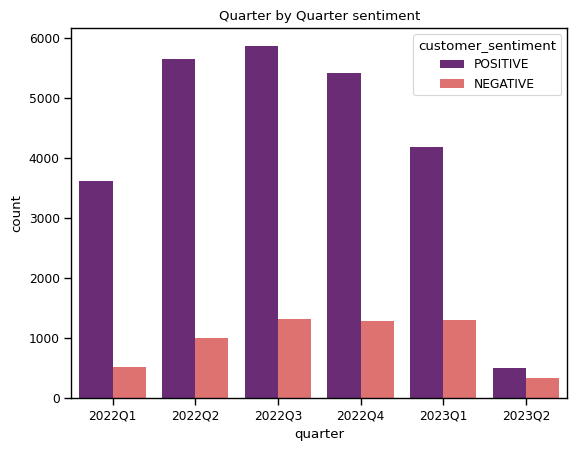

In [ ]:
sns.set_context('paper')
 

# create plot
sns.countplot(x = 'quarter', hue = 'customer_sentiment', data = final_merged_reviews, palette = 'magma')
plt.title('Quarter by Quarter sentiment')
plt.show()

Mounted at /content/drive


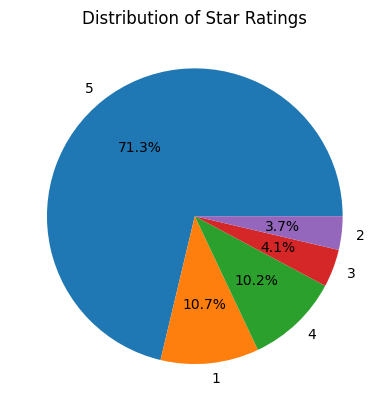

In [1]:

import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
final_merged_reviews = pd.read_csv("/content/drive/MyDrive/final_merged_reviews.csv")

rating_counts = final_merged_reviews['rating'].value_counts()
plt.pie(rating_counts, labels=rating_counts.index, autopct="%1.1f%%")
plt.title("Distribution of Star Ratings")
plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


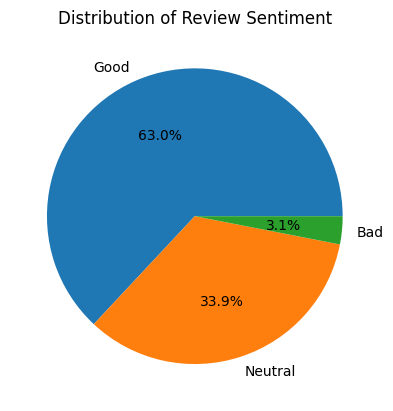